In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from misc import *
from scipy.signal import stft, blackman, hann
from math import pi
import pandas as pd


datapath = './../../audio/reduzidas'

In [7]:
audio_map = {audiofile:read_audio(os.path.join(datapath, audiofile)) for audiofile in os.listdir(datapath)}
deriv_audio_map = {audioname:discrete_derivative(audio,fs) for (audioname, (fs, audio)) in audio_map.items()}

In [8]:
wlen = 512
win = hann(wlen)
nfft = 1024
threshold = 5

spec_map = {audioname: stft(audio, fs, win, wlen, wlen/2, nfft) 
            for (audioname, (fs, audio)) in audio_map.items()}

processed_spec_map = {audioname: processSpec(Sxx, win, wlen, threshold) 
            for audioname, (f, t, Sxx) in spec_map.items()}
 

wlen = 512

win = hann(wlen)

nfft = 1024

threshold = 5



spec_map = {audioname: stft(audio, fs, win, wlen, wlen/2, nfft) 

            for (audioname, (fs, audio)) in audio_map.items()}



processed_spec_map = {audioname: 

SyntaxError: invalid syntax (<ipython-input-8-1cb3d93378f2>, line 21)

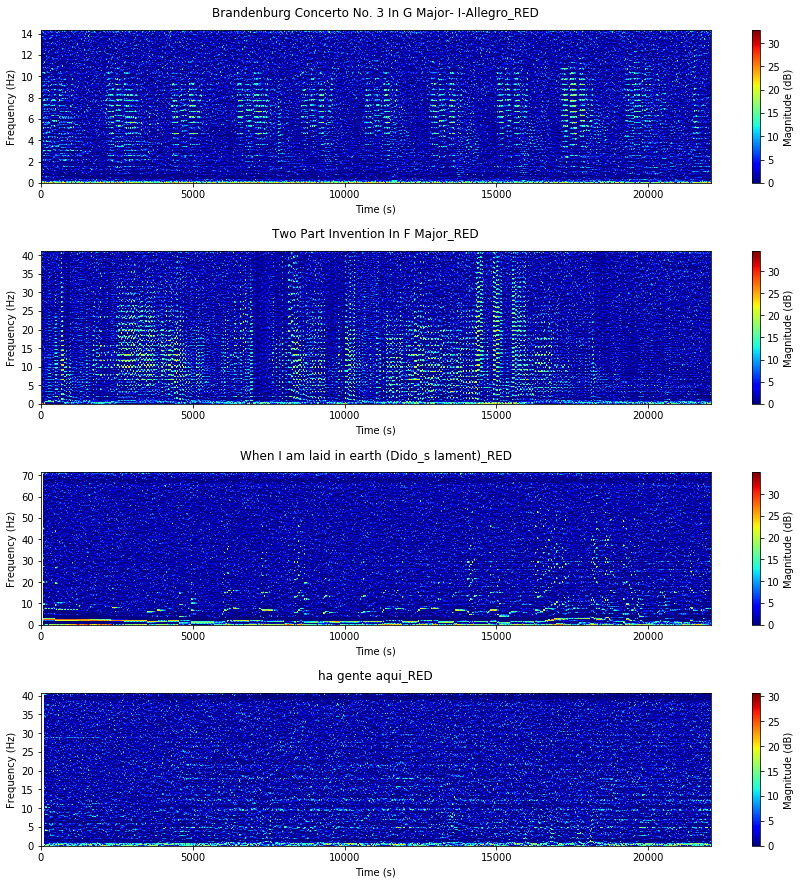

In [5]:
fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(15,15))
plt.subplots_adjust(hspace=0.45)
for (audio_name, (f, t, Sxx)), ax in zip(spec_map.items(), axes.flat): 
    power = processSpec(Sxx, win, wlen, 0)
    plot_spec(power, f, t, audio_name, ax)

In [38]:
power = processed_spec_map['Brandenburg Concerto No. 3 In G Major- I-Allegro_RED.wav']
f, t , Sxx = spec_map['Brandenburg Concerto No. 3 In G Major- I-Allegro_RED.wav']

abs_value = np.absolute(Sxx)
     

indexes = np.where(power>0)

<class 'numpy.complex64'>


In [32]:
listOfCoords = list(zip(indexes[0],indexes[1])) # Item i of this list is the ith spectral peak's 
                                                # frequency index and frame index

listOfTracks = []

for coord in listOfCoords:
    (f_bin, frame_index) = coord # Frames which belong to the frame we are analising
    if (frame_index==0) :
        x = Track(0,f[f_bin],power[coord]) 
        listOfTracks.append(x)



df = pd.DataFrame(listOfCoords,columns=['freq_bin','time_frame'])
r = (df[df.time_frame == 1]).to_numpy().tolist()


In [ ]:
freq_dist_thresh = 0.1


for j in range(1,len(t)-1):
    peaks_in_frame = (df[df.time_frame == j]).to_numpy().tolist()
    end = False
    while not(end) :
        list_of_pairs = []
        for peak in peaks_in_frame :
            (win,dif) = evaluate_closest_track(peak[0],listOfTracks,freq_dist_thresh,j,f)
            k = (win,dif,peak)
            list_of_pairs.append(k)
        n_list_of_pairs = list_of_pairs.copy()
        for value in n_list_of_pairs :
            if (value[0] == -1): 
                x = Track(j,f[value[2][0]],abs_value[tuple(value[2])]) # a new track is born
                listOfTracks.append(x) #append track
                list_of_pairs.remove(value)
                peaks_in_frame.remove(value[2]) #no need to run it again for that peak
            else :
                list_of_recurrencies = list(filter(lambda x : x[0] == value[0],n_list_of_pairs))
                if (len(list_of_recurrencies) > 1) : # We are not the only ones who chose this track
                    dists = list(map(lambda x : x[1],list_of_recurrencies))
                    if (value[1] == min(dists) and (len(listOfTracks[value[0]].getFrequency()) + listOfTracks[value[0]].getInitialFrame() <= j)):
                        listOfTracks[value[0]].frequency.append(f[((value[2])[0])])
                        listOfTracks[value[0]].amplitude.append((abs_value[tuple(value[2])]))
                        peaks_in_frame.remove(value[2])
                        list_of_pairs.remove(value)
                else :
                    listOfTracks[value[0]].frequency.append(f[(value[2][0])])
                    listOfTracks[value[0]].amplitude.append((abs_value[tuple(value[2])]))
                    list_of_pairs.remove(value)
                    peaks_in_frame.remove(value[2])
        
        end = (len(peaks_in_frame) == 0)            
    for track in listOfTracks:
         # Track wasnt assigned any peak on this frame
        if ((track.getFinalFrame() < 0) and (len(track.getFrequency()) + track.getInitialFrame() <= j)):
            track.setFinalFrame(j-1) # End of the track
        elif ((track.getFinalFrame() < 0) and (j==2464): # No more frames to go:
            track.setFinalFrame(j) # End of the track

In [ ]:
for track in listOfTracks :
        print(track.getInitialFrame())
        print(track.getFinalFrame())
        print(track.getFrequency())
        print(track.amplitude)
        print(len(track.amplitude))
        print('\n')


In [ ]:
part_1 = (listOfTracks[win].getFrequency())
                divisor = part_1[j-1 -listOfTracks[win].getInitialFrame()]
                if (dif/divisor > freq_dist_thresh): # The peak is too far away from the peaks of the previous frame
                    x = Track(j-1,f[f_bin],power[coord]) # a new track is born
                    listOfTracks.append(x)    
                else :
                    (listOfTracks[win].frequency).append(f[f_bin])
                    (listOfTracks[win].amplitude).append(power[coord])
                listOfCoords.remove(coord)